<a href="https://colab.research.google.com/github/dikshanaik/TA1/blob/master/MSIS522_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [0]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [186]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
titanic_test = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [187]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hold, Mr. Stephen",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [188]:
#Finding missing data using isna
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [189]:
#Finding missing data using isnull & sum
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [0]:
#Impute missing values
titanic['Embarked'].fillna(titanic['Embarked'].mode(),inplace=True)
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic["Cabin"]=titanic.Cabin.fillna("Other")

In [191]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Other,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Other,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Other,S


### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [192]:
# TODO
titanic.nlargest(16, ['Fare']).iloc[[-1]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
527,528,0,1,"Farthing, Mr. John",male,29.699118,0,0,PC 17483,221.7792,C95,S


### **Question 4: Out of all the females who survived, what's the name who has the 6th most expensive ticket?**

In [193]:
# TODO
titanic_female=titanic[(titanic.Sex == "female") & (titanic["Survived"] == 1)]
titanic_female.nlargest(6, ['Fare']).iloc[[-1]]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C


### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [194]:
# TODO
pd.pivot_table(titanic, index=["Sex", "Pclass"], values=['Survived'])

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

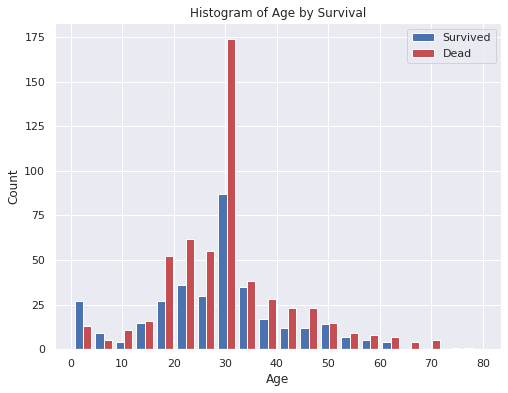

In [195]:
# TODO
plt.figure(figsize=(8,6))
plt.hist([titanic[titanic['Survived']==1]['Age'], titanic[titanic['Survived']==0]['Age']], 
         stacked=False, bins = 20, color = ['b','r'], label = ['Survived','Dead'])
plt.title('Histogram of Age by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

A lot of the deaths occured the mean age (between 30-40), and younger passengers seemed more likely to survive than the older passengers.

### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

In [196]:
#Survival Rate for Parch
pd.pivot_table(titanic, index=["Parch"], values=['Survived'])

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [197]:
#Survival Rate for SibSp
pd.pivot_table(titanic, index=["SibSp"], values=['Survived'])

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


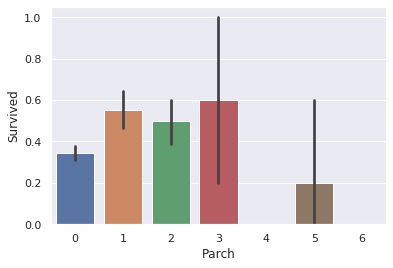

In [198]:
# Barplot of Parch
sns.barplot(x='Parch',y='Survived',data=titanic)

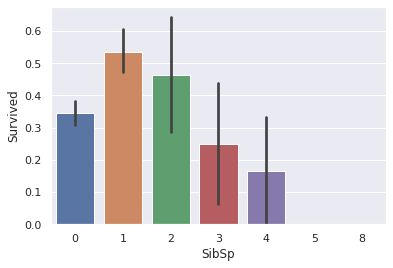

In [199]:
# Barplot of SibSp
sns.barplot(x='SibSp',y='Survived',data=titanic)

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

In [0]:
#Binning Age data into categories for easy interpretation & analysis.
bins=[0,10,18,25,40,90]
titanic['Age_Category'] = pd.cut(titanic["Age"], bins=bins, labels=['Adolescent','Teenager','Young Adult','Adult','Elder'])

In [201]:
#Encoding categorical variables
titanic = pd.get_dummies(titanic, columns=['Sex','Embarked','Age_Category'])
titanic.drop(['Name','Cabin','Ticket','Age'],axis = 1, inplace=True)
titanic.head()


,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Category_Adolescent,Age_Category_Teenager,Age_Category_Young Adult,Age_Category_Adult,Age_Category_Elder
0,1,0,3,1,0,7.2500,0,1,0,0,1,0,0,1,0,0
1,2,1,1,1,0,71.2833,1,0,1,0,0,0,0,0,1,0
2,3,1,3,0,0,7.9250,1,0,0,0,1,0,0,0,1,0
3,4,1,1,1,0,53.1000,1,0,0,0,1,0,0,0,1,0
4,5,0,3,0,0,8.0500,0,1,0,0,1,0,0,0,1,0


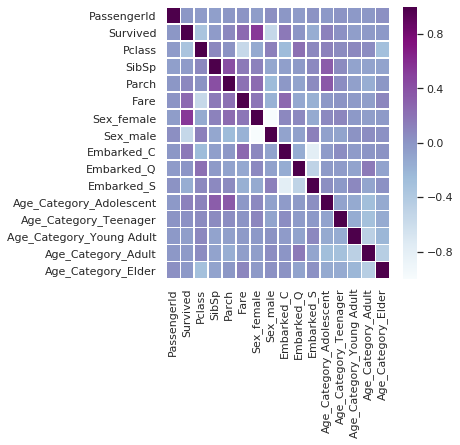

In [202]:
# plot results 
f, ax = plt.subplots(figsize =(5, 5)) 
sns.heatmap( titanic.corr(), ax = ax, cmap ="BuPu", linewidths = 0.5)

From the heatmap above I can deduce that the females were had a higher probability of surviving than the others.Fare is the second feature to have a higher correlation with the target variable. This could mean that people with higher fares were likely to be put on lifeboats & hence survive.
Also it appears that SibSp & Parch have a high correlation with each other. Considering both for our analysis would mean having repeated data. I would be dropping SibSp for this reason.

In [0]:
titanic.drop(['SibSp'],axis = 1, inplace=True)

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

As I mentioned above, Fare has a good amount of correlation with Survived. I will plot it to get a better understanding of the same.

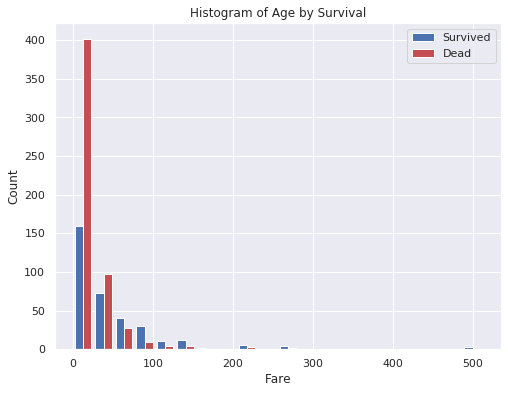

In [204]:
plt.figure(figsize=(8,6))
plt.hist([titanic[titanic['Survived']==1]['Fare'], titanic[titanic['Survived']==0]['Fare']], 
         stacked=False, bins = 20, color = ['b','r'], label = ['Survived','Dead'])
plt.title('Histogram of Age by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()

As can be seen, passengers having lower ticket fares were highly unlikely to survive confirming my above statement. This would be a significant feature for training the model.

### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

In [205]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), 
                                                    titanic['Survived'], test_size=0.2, 
                                                    random_state=42)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [206]:
# Score model
lr.score(x_test, y_test)

0.8156424581005587

In [207]:
from sklearn.metrics import classification_report

print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       110
           1       0.74      0.80      0.77        69

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

